In [1]:
import matplotlib.pylab as pl
%matplotlib inline



In [2]:
import numpy as np
from data_utilities import load_mnist
training_X, training_Y, validation_X, validation_Y, test_X, test_Y = load_mnist(shape=(28, 28), dtype=np.float16)

In [3]:
from random import choice
from scipy.misc import imresize
L = 56
def rescale(image):
    percentages = np.array([100, 125, 150, 175, 200])
    probabilities = np.ones(len(percentages)) / len(percentages)
    percentage = int(np.random.choice(percentages, p=probabilities))
    rescaled = imresize(image, percentage, interp='bilinear')
    canvas = np.zeros((L, L))
    if percentage == 200: X, Y = 0, 0
    else:
        ratio = float(percentages[-1] - percentage) / percentages[-1]
        X = choice(range(int(L * ratio)))
        Y = choice(range(int(L * ratio)))
    width = int(28 * percentage / 100.0)
    height = int(28 * percentage / 100.0)
    canvas[X : X + width, Y : Y + height] = rescaled
    return canvas

In [4]:
def generate_dataset(X):
    generated = []
    for point in X: generated.append(rescale(point))
    array = np.reshape(np.array(generated), (len(X), L * L)).astype(np.float16)
    return array

In [5]:
rescaled_mnist = (
    (generate_dataset(training_X), training_Y),
    (generate_dataset(validation_X), validation_Y),
    (generate_dataset(test_X), test_Y),
)

In [6]:
import joblib
joblib.dump(rescaled_mnist, '../rescaled-mnist/mnist')

['../rescaled-mnist/mnist']

In [7]:
rescaled_mnist[0][0].shape

(50000, 3136)

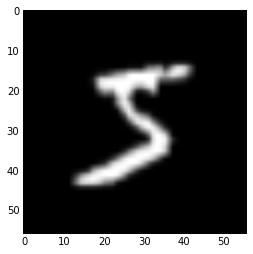

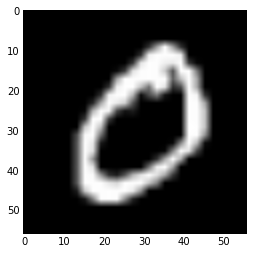

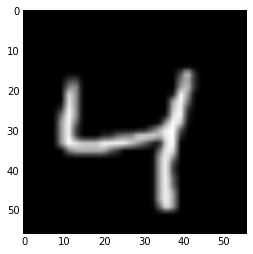

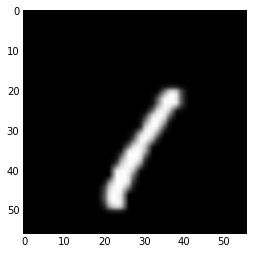

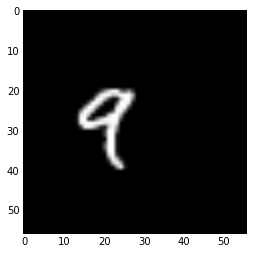

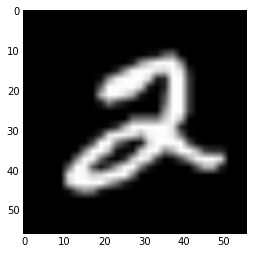

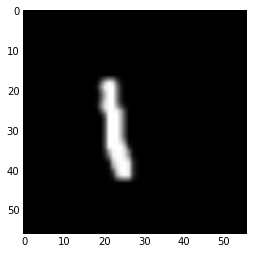

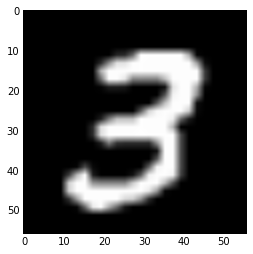

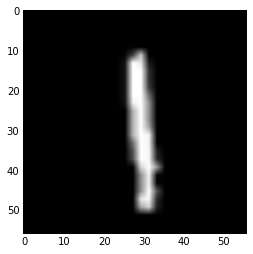

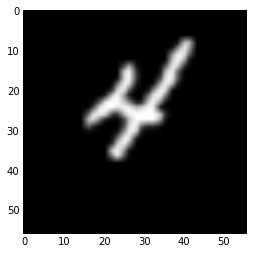

In [8]:
for image in rescaled_mnist[0][0][:10]:
    pl.figure()
    image.shape
    pl.imshow(image.reshape((L, L)), cmap='gray')